# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](../02_Project-Predictive-Modeling-for-Agriculture//Data/farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will build multi-class classification models to predict the type of `"crop"` and identify the single most importance feature for predictive performance.

### 1. Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

# Set plotting style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

### 2. Load Data

In [3]:
crops = pd.read_csv("../02_Project-Predictive-Modeling-for-Agriculture/Data/soil_measures.csv")

In [4]:
#View structure
print(crops.head())
print(crops['crop'].value_counts())

    N   P   K        ph  crop
0  90  42  43  6.502985  rice
1  85  58  41  7.038096  rice
2  60  55  44  7.840207  rice
3  74  35  40  6.980401  rice
4  78  42  42  7.628473  rice
crop
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


### 3. Check for missing values

In [5]:
print(crops.isna().sum())

N       0
P       0
K       0
ph      0
crop    0
dtype: int64


### 4. Explore Data

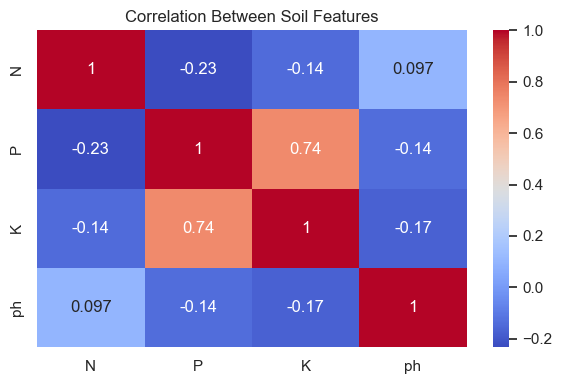

In [6]:
# Correlation Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(crops.drop('crop', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Soil Features")
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_3260\1647106758.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='crop', data=crops, order=crops['crop'].value_counts().index, palette='cubehelix')


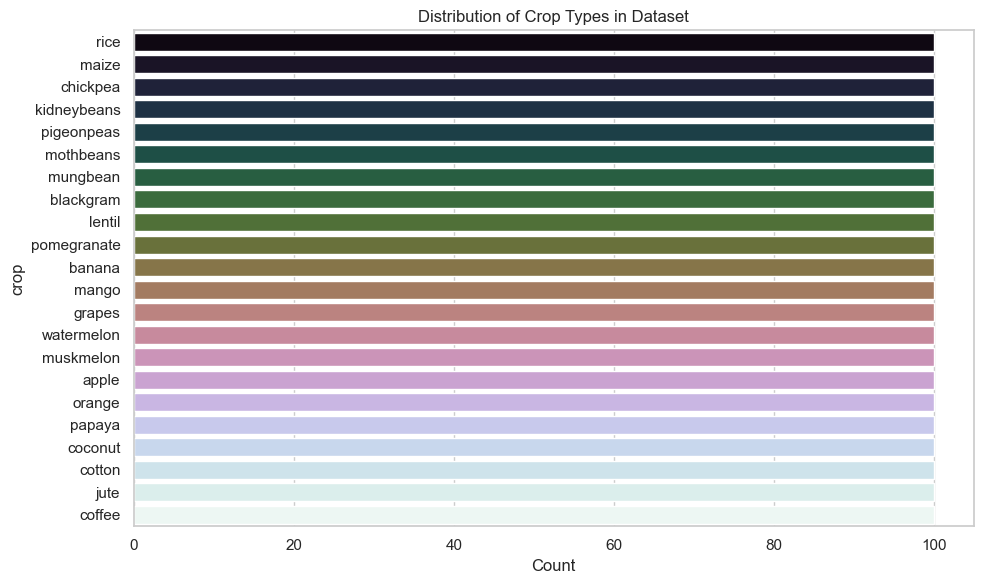

In [7]:
# Crop class distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='crop', data=crops, order=crops['crop'].value_counts().index, palette='cubehelix')
plt.title("Distribution of Crop Types in Dataset")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

### 5. Split Data

In [8]:
X = crops.drop('crop', axis=1)
y = crops['crop']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###  6. Evaluate Features Individually

In [9]:
features_dict = {}

for feature in ['N', 'P', 'K', 'ph']:
    model = LogisticRegression(multi_class='multinomial', max_iter=1000)
    model.fit(X_train[[feature]], y_train)
    y_pred = model.predict(X_test[[feature]])
    f1 = metrics.f1_score(y_test, y_pred, average='weighted')
    features_dict[feature] = f1
    print(f"F1 Score for {feature}: {f1:.3f}")

d:\Projects_Repo\ml-scientist-datacamp-journey\ml_track_venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\Projects_Repo\ml-scientist-datacamp-journey\ml_track_venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Projects_Repo\ml-scientist-datacamp-journey\ml_

F1 Score for N: 0.109


d:\Projects_Repo\ml-scientist-datacamp-journey\ml_track_venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Projects_Repo\ml-scientist-datacamp-journey\ml_track_venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


F1 Score for P: 0.114
F1 Score for K: 0.236
F1 Score for ph: 0.066


d:\Projects_Repo\ml-scientist-datacamp-journey\ml_track_venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Projects_Repo\ml-scientist-datacamp-journey\ml_track_venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


### 7. Identify Best Feature

In [10]:
best_feature = max(features_dict, key=features_dict.get)
best_predictive_feature = {best_feature: features_dict[best_feature]}

print("\nBest predictive feature dictionary:")
print(best_predictive_feature)


Best predictive feature dictionary:
{'K': 0.23551916994750854}


### 8. Plot F1 Score Comparison

C:\Users\hp\AppData\Local\Temp\ipykernel_3260\1292519354.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(features_dict.keys()), y=list(features_dict.values()), palette="viridis")


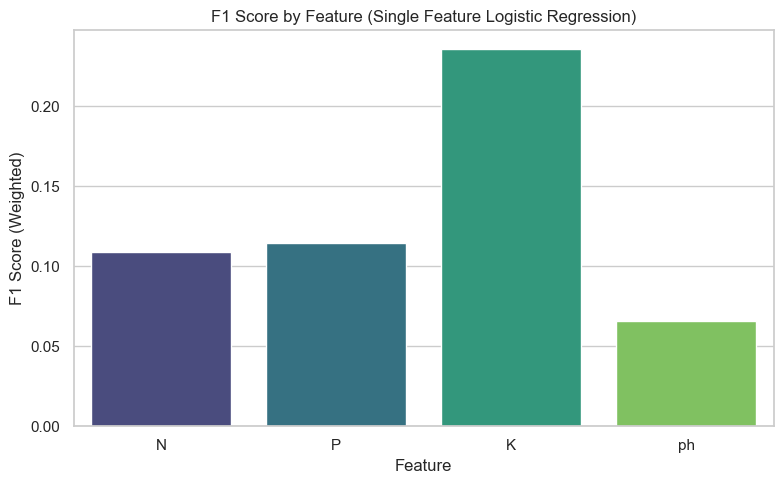

In [11]:
plt.figure(figsize=(8, 5))
sns.barplot(x=list(features_dict.keys()), y=list(features_dict.values()), palette="viridis")
plt.title("F1 Score by Feature (Single Feature Logistic Regression)")
plt.ylabel("F1 Score (Weighted)")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()

###  9. Random Forest Feature Importance

In [12]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_
feature_names = X.columns

C:\Users\hp\AppData\Local\Temp\ipykernel_3260\2560922325.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="Set2")


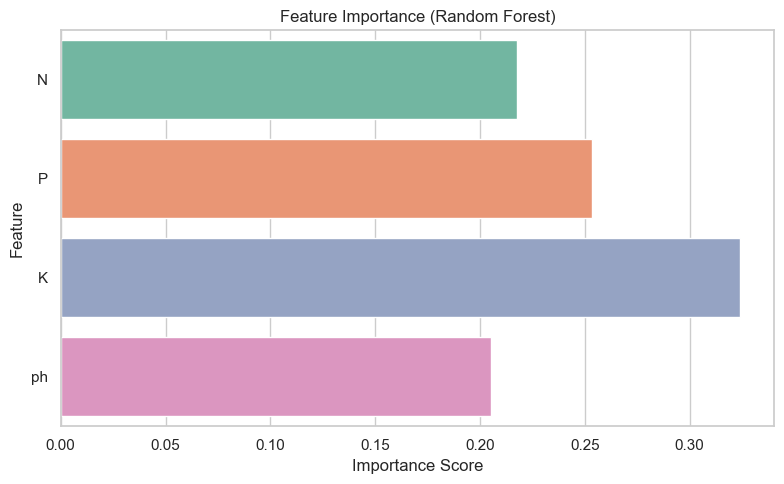

In [13]:
# Plot feature importances
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names, palette="Set2")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()